# Salary Analytics

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Давайте посморим на датасет
**Note**: 
* есть колонка overall и колонки по **избранным** категориям. 
* **overall** - это в целом по экономике, a не какая-то статистика по избранным категориям.

In [2]:
salary_data = pd.read_csv("salary_data.csv")
salary_data.iloc[3:9, :]

,year,restaurants_and_hotels,education,healthcare_and_socials,construction_industry,processing_industry,overall,mining,finances_and_insurances,restaurants_and_hotels_inf,...,finances_and_insurances_inf,finances_and_insurances_inf_adj,restaurants_and_hotels_in_dollars,education_in_dollars,healthcare_and_socials_in_dollars,construction_industry_in_dollars,processing_industry_in_dollars,overall_in_dollars,mining_in_dollars,finances_and_insurances_in_dollars
3,2003,3967,3387,3663,6177,5603,5499,13912,15561,2189,...,8588,93400,130,111,120,202,183,180,456,510
4,2004,4737,4203,4612,7305,6849,6740,16842,17384,2301,...,8444,91834,164,145,159,252,236,233,581,600
5,2005,6033,5430,5906,9043,8421,8555,19727,22464,2586,...,9630,104733,212,191,208,318,296,301,694,790
6,2006,7522,6983,8060,10869,10199,10634,23145,27886,2873,...,10650,115826,279,259,299,404,379,395,859,1035
7,2007,9339,8778,10037,14333,12879,13593,28108,34880,3246,...,12122,131835,363,341,390,557,501,528,1093,1356
8,2008,11536,11317,13049,18574,16050,17290,33206,41872,3533,...,12825,139481,472,463,534,760,657,708,1359,1714


In [3]:
salary_data.dtypes

year                                  int64
restaurants_and_hotels                int64
education                             int64
healthcare_and_socials                int64
construction_industry                 int64
processing_industry                   int64
overall                               int64
mining                                int64
finances_and_insurances               int64
restaurants_and_hotels_inf            int64
restaurants_and_hotels_inf_adj        int64
education_inf                         int64
education_inf_adj                     int64
healthcare_and_socials_inf            int64
healthcare_and_socials_inf_adj        int64
construction_industry_inf             int64
construction_industry_inf_adj         int64
processing_industry_inf               int64
processing_industry_inf_adj           int64
overall_inf                           int64
overall_inf_adj                       int64
mining_inf                            int64
mining_inf_adj                  

## Функции для графиков

#### Один линейный график (с точками)

In [4]:
def plot_one_linear(x, y, caps=None, size = (12,5)):
    
    fig, ax = plt.subplots(figsize=size)
    
    sns.lineplot(
        x=x, 
        y=y,
        color="#334e70",
        linewidth=2,
        marker='o'
    )

    if caps is not None:
        assert isinstance(caps, (list, tuple)), "TypeError: must be list or tuple"
        assert len(caps) == 3, "IndexError"
        assert type(caps[0]) == type(caps[1]) == type(caps[1]) == str, "TypeError"
        plt.title(caps[0])
        plt.xlabel(caps[1])
        plt.ylabel(caps[2])
        
    plt.ylim(bottom=0)  # min of vertical axis in 0
    plt.show()

### Несколько линейных на одном axis (multiple linear)

In [5]:
def multiple_linear(df, caps=None, palette=None, size = (12,5)):
    
    fig, ax = plt.subplots(figsize=size)
    
    if palette is None:
        palette = "rocket_r"

    sns.lineplot(
        data=df,
        linewidth=1.5,
        marker='o',
        markersize = 5,
        palette = palette,
        dashes=False,  # off auto line style variability
        alpha=0.85
    )

    # replace legend out of graph
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    if caps is not None:
        assert isinstance(caps, (list, tuple)), "TypeError: must be list or tuple"
        assert len(caps) == 3, "IndexError"
        assert type(caps[0]) == type(caps[1]) == type(caps[1]) == str, "TypeError"
        plt.title(caps[0])
        plt.xlabel(caps[1])
        plt.ylabel(caps[2])
        
    plt.ylim(bottom=0)  # min of vertical axis in 0
    plt.show()

### Получить данные для multiple linear

In [6]:
def get_new_df(df, pattern=None, overall_col=True):

    df = df.copy()
    df.set_index("year", inplace=True)

    if pattern is None:
        return df
    if pattern == "":  # nominal salary
        new_df = df.iloc[:, :8]  # we need first eight cols
    else:
        new_df = df.filter(like=pattern)  # filter cols
        new_df.columns = [col[:-len(pattern)] for col in new_df.columns]  # get beateful name (for caption)

    if not overall_col:
        new_df = new_df.drop("overall", axis=1, inplace=False)


    return new_df

## Анализ динамики номинальной зарплаты

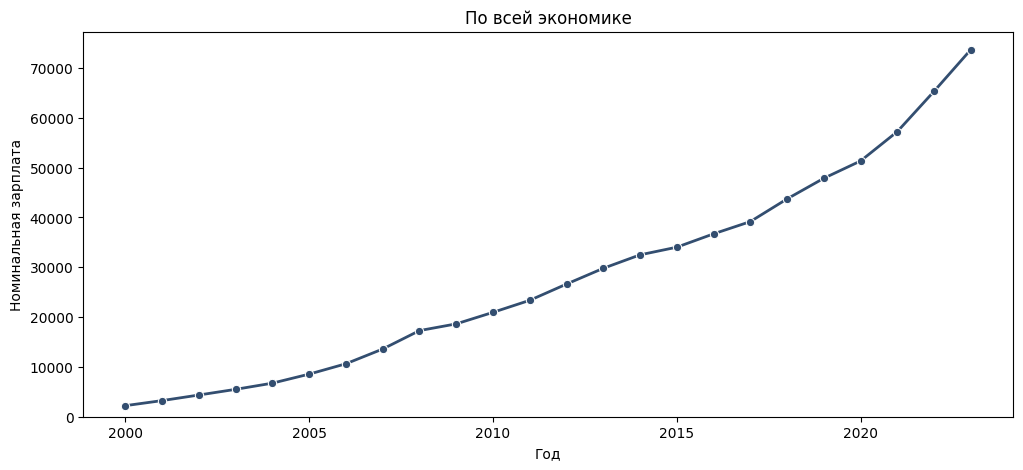

In [7]:
plot_one_linear(x = salary_data.year, y=salary_data.overall, caps = ["По всей экономике", "Год", "Номинальная зарплата"])

Номинальные зарплаты в целом по экономике явно растут

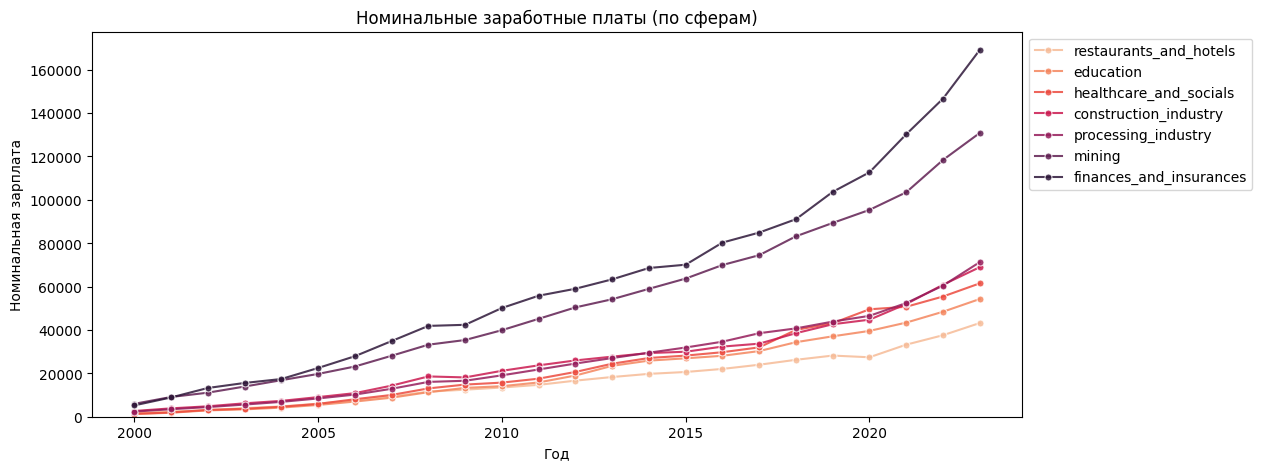

In [8]:
data = get_new_df(salary_data, "", overall_col=False)
captions = ["Номинальные заработные платы (по сферам)", "Год", "Номинальная зарплата"]
multiple_linear(data, caps=captions)

* Номинальные зарплаты по избранным категориям тоже явственно растут. 
* Одни быстрее других, "добыча полезных ископаемых" и "финансовая и страховая деятельность" выгодно выделяются на общем фоне.

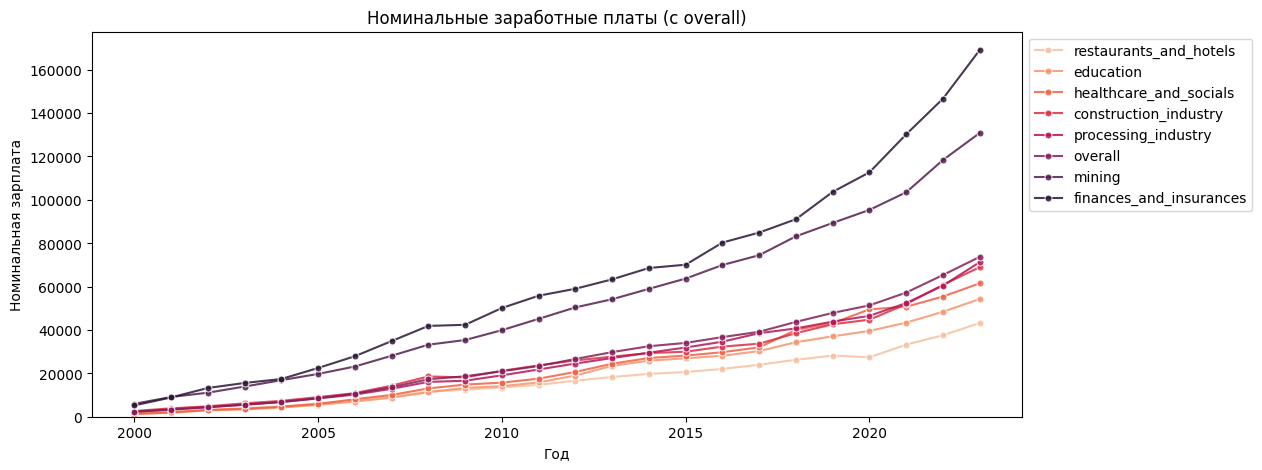

In [9]:
data = get_new_df(salary_data, "", overall_col=True)
captions = ["Номинальные заработные платы (c overall)", "Год", "Номинальная зарплата"]
multiple_linear(data, caps=captions)

Если мы перерисуем график со значениями по всей экономике (**overall**), то заметим, что она теряется фоне с "нижней группой" зарплат.

Общий вывод по анализу номинальных зарплат: **зарплаты растут, всё выглядит замечательно**. 

## Анализ динамики заработной платы с учётом инфляции

Notes: 
* Была **учтена инфляция**, затем столбец был домножен на **корректирующий коэффициент**, разный для каждого столбца. 
* Это вполне легально, т.к. если мы всесь столбец домножим на одно число динамика не изменится. 
* Цель этого коэффициента в приведении зарплаты к "как ощущалось бы в 2023". Зарплата с учётом инфляции за 2023 должна совпадать с номинальной зарплатой за 2023.

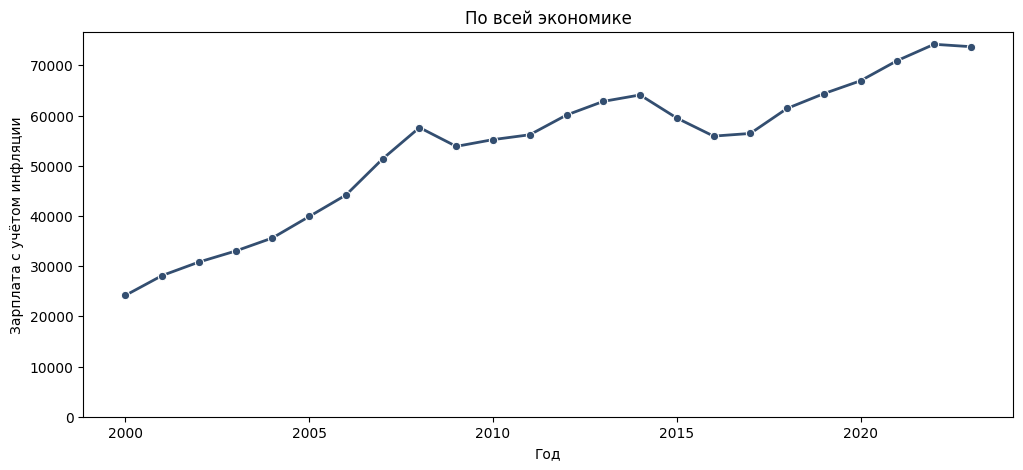

In [10]:
plot_one_linear(x = salary_data.year, y=salary_data.overall_inf_adj, caps = ["По всей экономике", "Год", "Зарплата с учётом инфляции"])

* В среднем по экономике рост уже не так впечатляет. 
* Рост по всему периоду не такой большой, как было на графике номинальной зп.
* По некоторым годам наблюдается снижение. 
* В "средине" наблюдается простой.
* С 2022 по 2023 наблюдается небольшое снижение

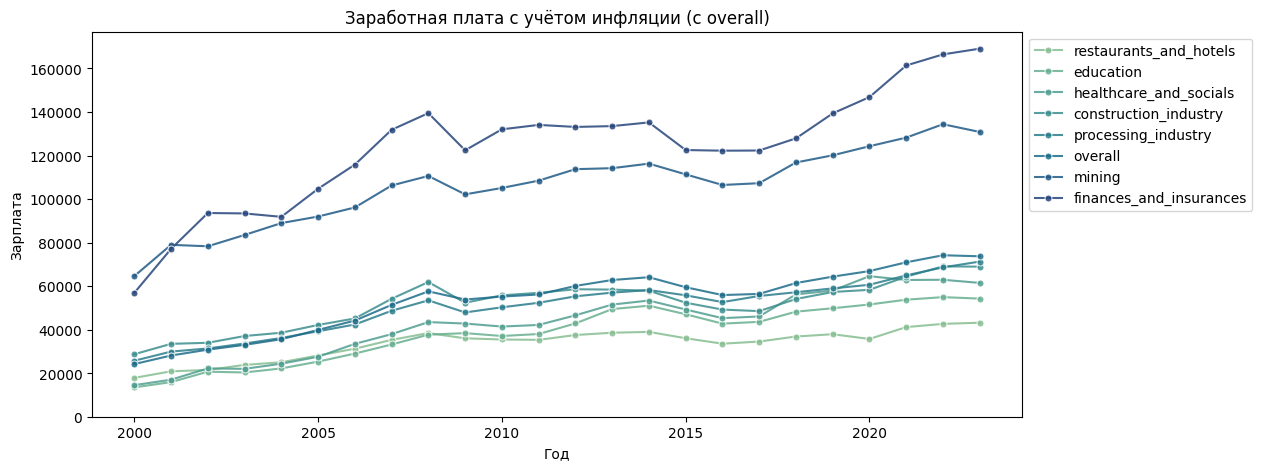

In [11]:
data = get_new_df(salary_data, "_inf_adj", overall_col=True)
captions = ["Заработная плата с учётом инфляции (c overall)", "Год", "Зарплата"]
multiple_linear(data, caps=captions, palette="crest")

* overall находится на верху "нижнего кластера"
* "нижний кластер" выгдлядит более пологим, чем на прошлом графике. Но это эффект маштаба, из-за больших зарплат в финансах и добыче.
* реальные запрплаты "в добыче полезных ископаемых", "финансах и страховании" растут быстрее, чем в среднем по экономике.

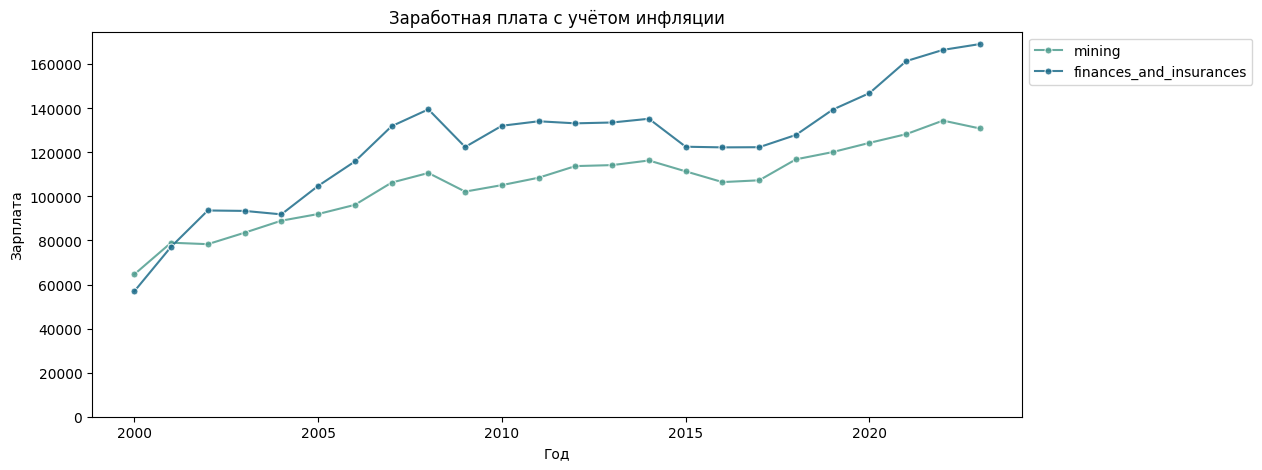

In [12]:
data = get_new_df(salary_data, "_inf_adj", overall_col=False).iloc[:, -2:]

captions = ["Заработная плата с учётом инфляции", "Год", "Зарплата"]
multiple_linear(data, caps=captions, palette="crest")

На графике выше можно увидеть, что у людей работающих в добыче и финансах:
* высокая заработная плата
* зарплата растёт умеренными темпами 
* имеется плато с 2009 по 2018 год

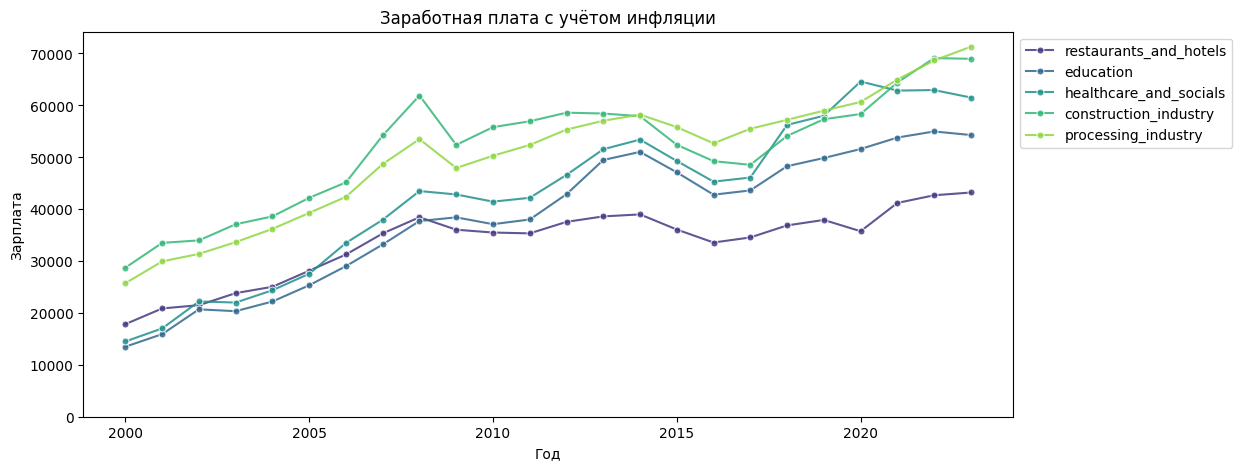

In [13]:
data = get_new_df(salary_data, "_inf_adj", overall_col=False).iloc[:, :5]

captions = ["Заработная плата с учётом инфляции", "Год", "Зарплата"]
multiple_linear(data, caps=captions, palette="viridis")

Возьмём самые низкие зарплаты по 2023. Увидим, что зарплаты демонстрируют небольшой рост

Общий вывод по блоку с учётом инфляции: 
* зарплаты в общепите и гостиничном бизнесе после 2008 в реальном выражении почти не растут
* самый скромный рост в сфере образования (если считаем, что restaurants and hotels не растут)
* в среднем по экномике и большинство сфер занятности имеют скромный рост
* зарплаты в финансах растут с учётом инфляции быстрее, чем прочие, но рост умеренный с плато с 2009 по 2018 год

## Анализ динамики зарплат с учётом курса доллара
* Как считалось: **Номинальная_зарплата / Медианный_курс_доллара = Зарплата_в_долларах**
* У доллара тоже есть инфляция, но уже ладно.

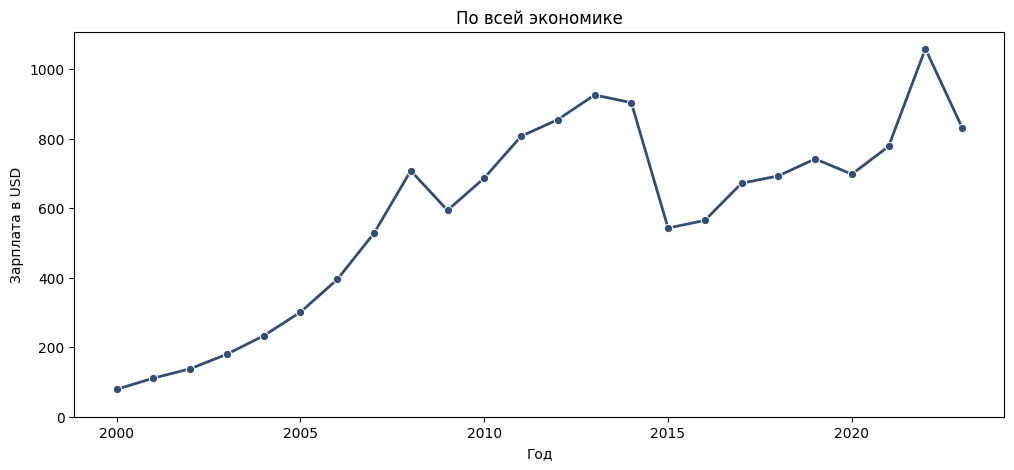

In [14]:
plot_one_linear(x = salary_data.year, y=salary_data.overall_in_dollars, caps = ["По всей экономике", "Год", "Зарплата в USD"])

В среднем по экономике зарплата в USD:
* зп явно растёт по 2008, рост похож визуально на экспоненциальный
* рост с 2008 по 2023 незначительный
* было значительное падение с 2014 на 2015, "обвалился" курс
* в 2022 был скачок, обеспеченный сниженным курсом доллара (медианным за год)

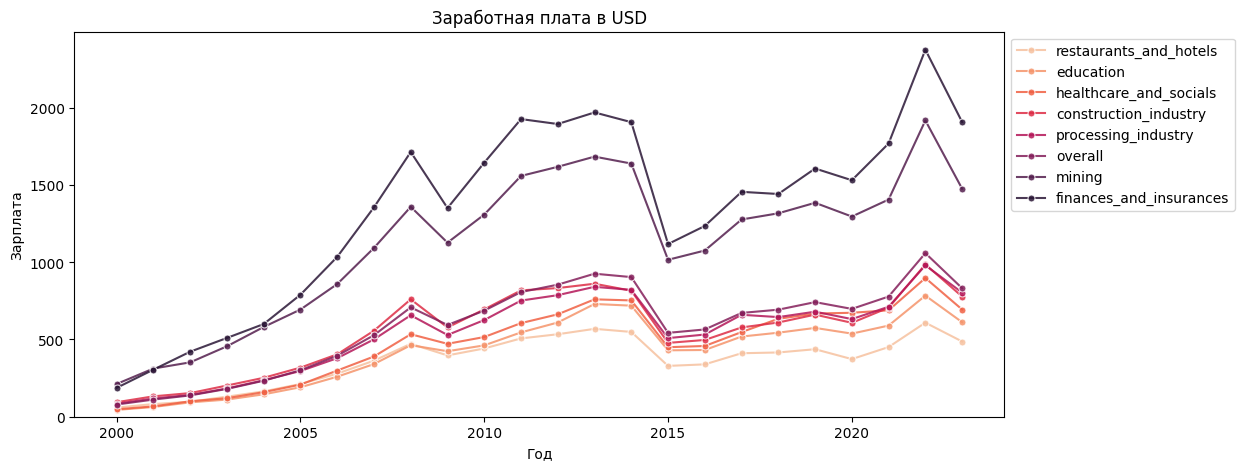

In [15]:
data = get_new_df(salary_data, "_in_dollars", overall_col=True)
captions = ["Заработная плата в USD", "Год", "Зарплата"]
multiple_linear(data, caps=captions)

Из графика видно, что все заработные платы **повторяют динамику** со средним по экономике, т.к. курс для всех одинаковый. <br>

**Более подбробное описание динамики 2009-2022**: с 2009 по 2011 был бодрый рост, который не продолжился, а перешёл в плато 2011-2014, затем обвал, затем плавный востановительный рост до 2022

Вывод по этому блоку:
* хорошо получать зарплату в долларах, а жить на рубли
* великолепный рост с 2000 по 2008, незначительный рост с 2008 по 2023


## Обобщающие выводы

* Номинальные зарплаты растут
* Зарплаты в реальном выражениии растут демонстрируют меннее окрыляющий рост
* Зарпалаты в долларах для всех сфер занятости демонстрируют одну динамику
* Заработная плата в долларх более явно показывает последствия значимых событий
* С 2000 по 2008 был значительный рост заработка граждан
* С 2008 по 2023 рост скромный